# This is the first assignment in Intro to Ai

By Alexander Rambech

In [165]:
import pandas as panda
import matplotlib.pyplot as plt
import numpy as np
import datetime
import seaborn as sns

In [186]:
df = panda.read_csv('Ruter_data.csv', delimiter=";")

In [187]:
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


In [188]:
df.shape

(6000, 17)

In [189]:
df = df.drop_duplicates()
df.shape

(5997, 17)

<AxesSubplot:xlabel='Passasjerer_Ombord', ylabel='count'>

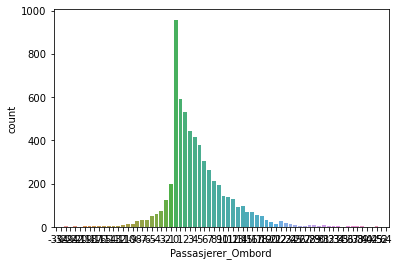

In [190]:
sns.countplot(x="Passasjerer_Ombord", data=df)

## 1. Passengers

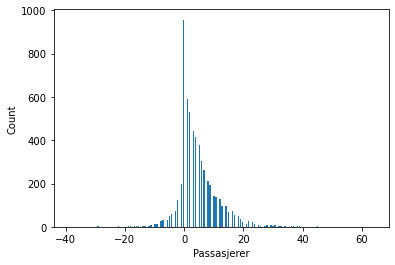

In [191]:
plt.hist(df.Passasjerer_Ombord, bins=150, rwidth=0.7)
plt.xlabel("Passasjerer")
plt.ylabel("Count")
plt.show()

In [192]:
threshold_upper = df["Passasjerer_Ombord"].quantile(0.90)
threshold_lower = df["Passasjerer_Ombord"].quantile(0.10)
df2= df[(df["Passasjerer_Ombord"]<threshold_upper)
                          &(df["Passasjerer_Ombord"]>threshold_lower)]
df2.shape

(4694, 17)

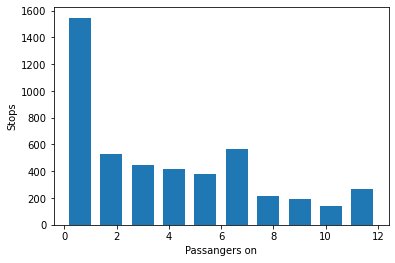

In [193]:
plt.hist(df2.Passasjerer_Ombord, bins=10, rwidth=0.7)
plt.xlabel("Passangers on")
plt.ylabel("Stops")
plt.show()
#sns.countplot(x="Passasjerer_Ombord", data=new_dataframe)

## 2. Time of day

In [246]:
#new_dataframe.Tidspunkt_Planlagt_Avgang_Holdeplass_Fra.astype(str).str[:2] == "25"
df2.head(50)
#panda.to_datetime(df2["Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"])
#df2.loc[df2["Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"].astype(datetime64) > 23]

sub = "25:"

#df2["Remove"] = df2["Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"].str.find(sub)

df2[sub]["24:"]

KeyError: '25:'

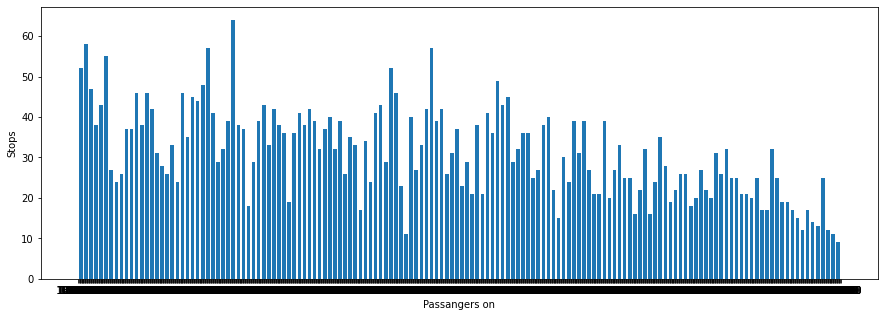

In [247]:
plt.figure(figsize=(15,5))
plt.hist(df2.Tidspunkt_Planlagt_Avgang_Holdeplass_Fra, bins=150, rwidth=0.7)
plt.xlabel("Passangers on")
plt.ylabel("Stops")
plt.show()

In [248]:
df_linje = df2.groupby(['Linjenavn'])['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'].sum().reset_index()
plt.figure(figsize=(15,15))
df_linje.sort_values(['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], ascending=False).head(30).plot(kind='barh', y='Tidspunkt_Planlagt_Avgang_Holdeplass_Fra', x='Linjenavn', figsize=(15,10))


TypeError: no numeric data to plot

<Figure size 1080x1080 with 0 Axes>

Really struggeling to get this data to be datetime or numeric.

In [249]:
#new_new_dataframe = new_dataframe[new_dataframe["Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"].replace(["25:", "24:"], ["01:", "00:"])]
df2.Tidspunkt_Planlagt_Avgang_Holdeplass_Fra.replace({'25':'01'}, regex=True)
df2.head(50)

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Remove
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5,-1
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5,-1
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6,-1
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10,-1
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10,-1
5,3110-2020-08-01T16:16:00+02:00,01/08/2020,Oslo,Nordøst,Bjerke,Veitvet (mot Kalbakken),Rødtvet (mot Kalbakken),Lokal,Oslo,31,0,17:22:56,17:23:23,17:16:00,17:16:00,151,8,-1
6,15010-2020-07-28T13:09:00+02:00,28/07/2020,Viken,Vest,Bærum,Nedre Toppenhaug,Øvre Toppenhaug,Lokal,Viken,150,0,13:19:00,13:19:05,13:17:00,13:17:00,112,1,-1
8,21002-2020-08-16T14:33:00+02:00,16/08/2020,Viken,Vest,Bærum,Stein gård,Knabberudveien,Lokal,Viken,150,1,15:10:12,15:10:34,15:09:00,15:09:00,112,2,-1
9,15002-2020-08-13T18:09:00+02:00,13/08/2020,Viken,Vest,Bærum,Bekkestua bussterminal (Plattform C),Stabekk skole,Lokal,Viken,150,0,18:37:41,18:38:19,18:29:00,18:29:00,112,4,-1
10,49005-2020-06-23T21:30:00+02:00,23/06/2020,Viken,Sør,Indre Østfold,Fjell,Langholen,Lokal,Viken,490,1,22:14:07,22:14:09,22:09:00,22:09:00,106,1,-1


## 3. Scheduled time vs. Actual arrival time

Here the thought was to compare the scheduled time vs. actual time of arrival, but I never figured out the datatime part...

So here I made a compareson between kommune and passangers instead:

<AxesSubplot:ylabel='Kommune'>

<Figure size 1080x1080 with 0 Axes>

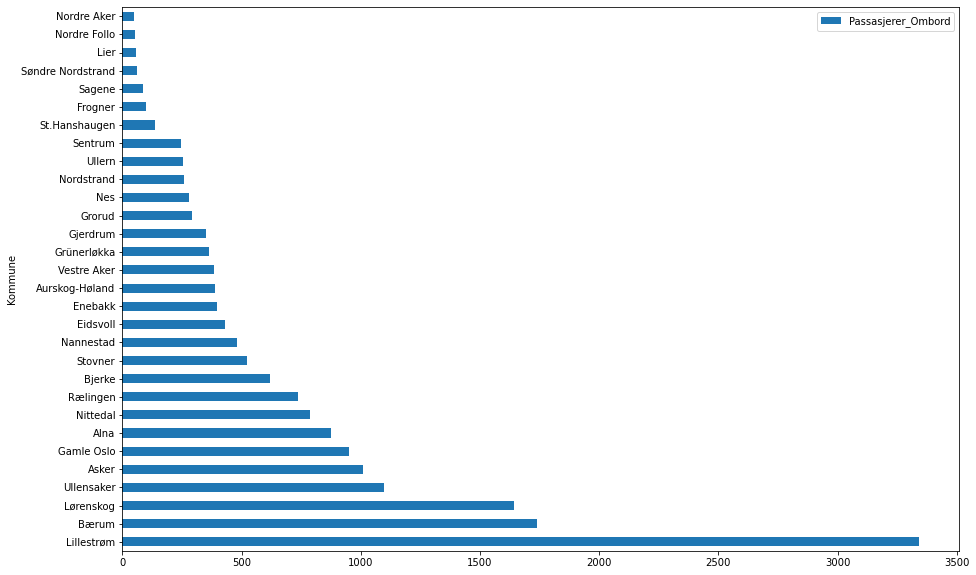

In [250]:
df_linje = df2.groupby(['Kommune'])['Passasjerer_Ombord'].sum().reset_index()
plt.figure(figsize=(15,15))
df_linje.sort_values(['Passasjerer_Ombord'], ascending=False).head(30).plot(kind='barh', y='Passasjerer_Ombord', x='Kommune', figsize=(15,10))


Looks like the commuters are the most frequent bussusers! 

## 4. Line Populatity

In [214]:
# How many people get onto the busstation
df3 =df2.set_index(["Linjenavn" , "Passasjerer_Ombord"])
grouped = df3.groupby(level=df3.index.names.difference(["Passasjerer_Ombord"]))
grouped.sum()

,Linjeretning,Kjøretøy_Kapasitet
Linjenavn,,
100,143,48169
110,124,27666
110E,6,1949
115E,5,1495
120,47,8700
...,...,...
5N,2,302
60,56,4708
67,1,33


<AxesSubplot:ylabel='Linjenavn'>

<Figure size 1080x1080 with 0 Axes>

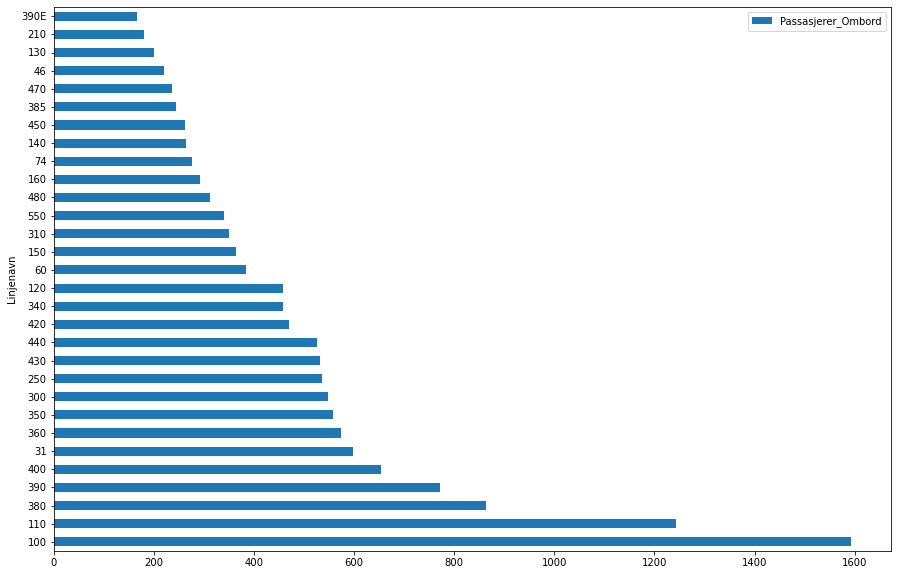

In [235]:
#Let's try and somehow plot this

df_linje = df2.groupby(['Linjenavn'])['Passasjerer_Ombord'].sum().reset_index()
plt.figure(figsize=(15,15))
df_linje.sort_values(['Passasjerer_Ombord'], ascending=False).head(30).plot(kind='barh', y='Passasjerer_Ombord', x='Linjenavn', figsize=(15,10))


## 5. Buss Station Popularity

<AxesSubplot:ylabel='Holdeplass_Fra'>

<Figure size 1080x1080 with 0 Axes>

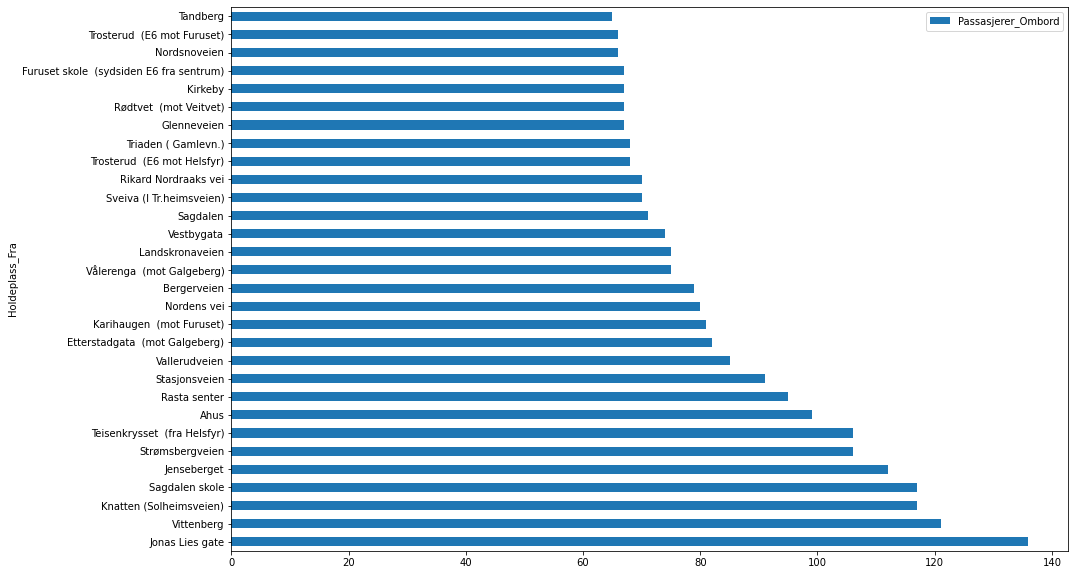

In [236]:
df_linje = df2.groupby(['Holdeplass_Fra'])['Passasjerer_Ombord'].sum().reset_index()
plt.figure(figsize=(15,15))
df_linje.sort_values(['Passasjerer_Ombord'], ascending=False).head(30).plot(kind='barh', y='Passasjerer_Ombord', x='Holdeplass_Fra', figsize=(15,10))

Looks like a lot of people are leaving Jonas Lies gate

<AxesSubplot:ylabel='Holdeplass_Til'>

<Figure size 1080x1080 with 0 Axes>

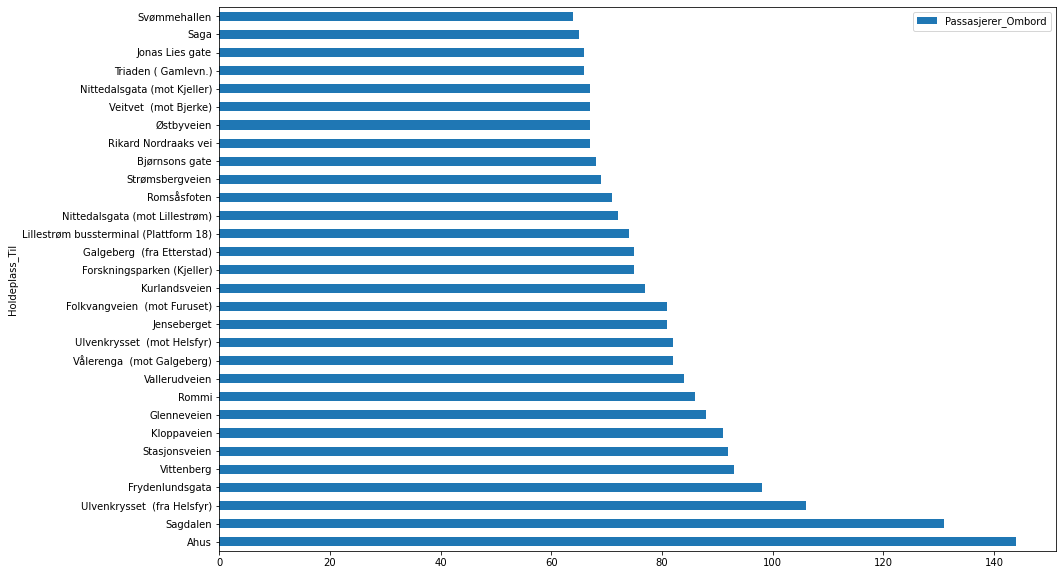

In [238]:
df_linje = df2.groupby(['Holdeplass_Til'])['Passasjerer_Ombord'].sum().reset_index()
plt.figure(figsize=(15,15))
df_linje.sort_values(['Passasjerer_Ombord'], ascending=False).head(30).plot(kind='barh', y='Passasjerer_Ombord', x='Holdeplass_Til', figsize=(15,10))

But even more people go to Ahus.